## Misssing Values - Feature Engineering

Why are their missing values ?? Survay--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valied 
3. Men--salery
4. Woman--age
5. People may have died

Data science Projects---Dataset should be collected from multiple sources

## what are different types of Missing Data?

### 1. Missing completly at random(MCAR):
    A variable is missing completely at at random (MCAR) if the probability of being missing is same for all observations .When data is MCAR, there is absolutely no relationship between the data missing and any other values, obseved or missing, within the dataset. in other words those missing datasets are random subset of the data. There is nothing systemetic going on that makes some data more likely to be missing than other

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

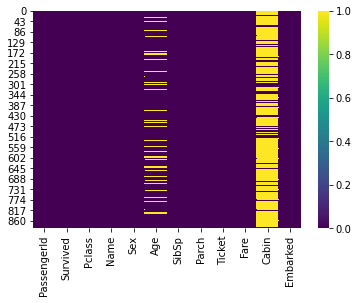

In [5]:
sns.heatmap(df.isnull(),cmap='viridis')

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN



### 2.Missing Data not At Random MNAR: Systemetic missing values
there is absolutely some ralationship between the data missing and any other values, observed or missing, within the dataset.

In [7]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [8]:
#find the percentage of null values
df.cabin_null.mean()

0.7710437710437711

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### 3. Missing at random(MAR)

# all techniques of handling missing vlaues
1. Mean / Meadian / Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End Of Distribution Imputation 
5. Arbitrary Imputation 
6. Frequent Categories Imputation 

### 1.Mean / Median / Mode imputation 
when we should apply ?
Mean / Median imputation has the assumption that the data is missing comletely at random (MCAR).
We solve this by replacing the NAN with most frequent occurence of the variables

In [11]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
# let's see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median=df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df.Age.std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

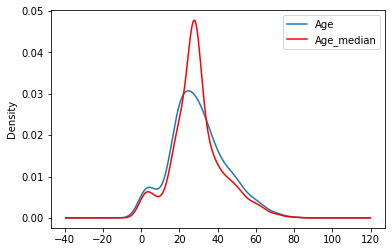

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Advanteges and Disadvanteages of Mean / Meadian Imputation

#### Advantages
1. Easy to implement(Robust to outlies)
2. Fater way to obtain the complete dataset

#### Disadvantages
1. Change or disrortion in original variance 
2. impacts correction 

### 2. Random Sample Imputation
Aim: Random sample imputation is consist of taking random observations from the dataset and we use this observation to replace the NAN values

When should it be used ? it assumes that the data are missing completely at random (MCAR)

In [20]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [21]:
df['Age'].isnull().sum()

177

In [22]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## it will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_sample']=random_sample

In [24]:
impute_nan(df,'Age',median)


In [25]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_sample
0,0,22.0,7.2500,22.0,22.0,NaN
1,1,38.0,71.2833,38.0,38.0,NaN
2,1,26.0,7.9250,26.0,26.0,NaN
3,1,35.0,53.1000,35.0,35.0,NaN
4,0,35.0,8.0500,35.0,35.0,NaN


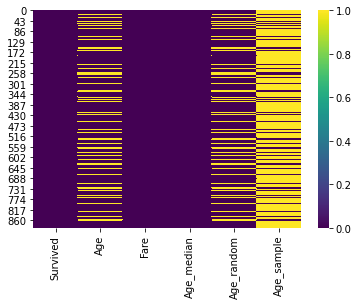

In [26]:
sns.heatmap(df.isnull(),cmap='viridis')

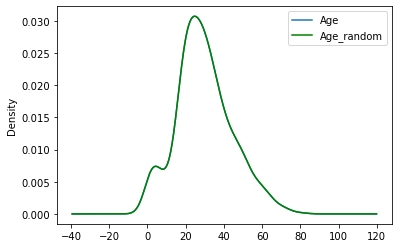

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [28]:
df['Age_random'].isnull().sum()

177

### Advanteges
1. easy to implement
2. there is less distrotion in varience 
### Disadvantage
1. in every situation randomness wont work 

### 3.Capturing NAN values with a new Feature

It works well when data are not missing completely at random (MNAR)

In [29]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [30]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [31]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [32]:
df.Age.median()

28.0

In [33]:
df.Age.fillna(df.Age.median(),inplace=True)

In [34]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advanteges
1. Easy to implement 
2. Captures the important of missing values
#### Disadvantages
    1. Creating Adittiional Features (Curse of Dimasionality) 

### 4. End Of Distribution Imputation
if there is suspician that the missing value is not at random then capturing that information is important. In this scenerio, one would want to replace missing data with values that are at the tails of the distribution of the variable. 


In [35]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


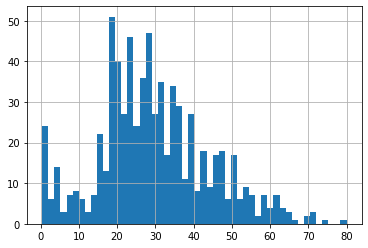

In [36]:
df.Age.hist(bins=50)

In [37]:
extreme=df.Age.median()+3*df.Age.std()
extreme

71.57949199700212

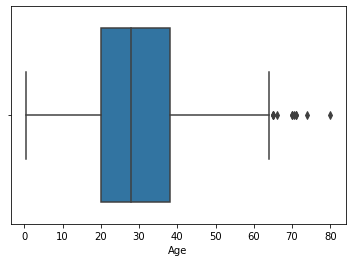

In [38]:
sns.boxplot('Age',data=df)

In [39]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable]=df[variable].fillna(median) #or df[variable].fillna(median,inplace=True)

In [40]:
median=df.Age.median()

In [41]:
impute_nan(df,'Age',median,extreme)

In [42]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [43]:
df.Age.isnull().sum()

0

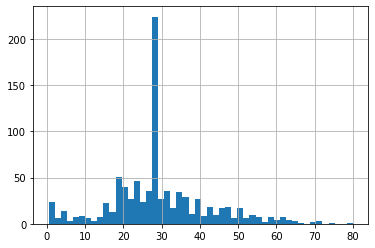

In [44]:
df.Age.hist(bins=50)

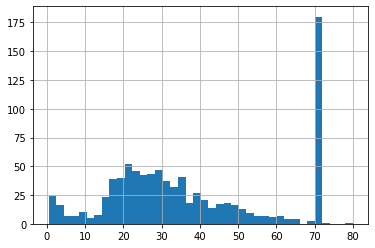

In [45]:
df.Age_end_distribution.hist(bins=40)

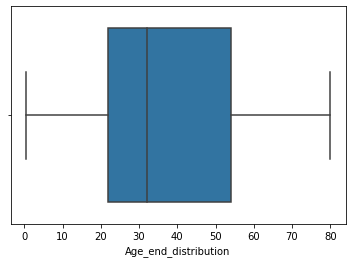

In [46]:
sns.boxplot('Age_end_distribution',data=df)

#### Advantages
1. Easy to implement 
2. captures the importance of missingess if there is one 
#### Disadvantes
1. Distors the original distribution of the variable 
2. if missingess is not important, it may mask the predective power of the original variable by distorting its distribution 
3. If the number of NA is big, it will mask true outliers in the distribution 
4. If the number NA is small, the replaced NA may be considered an outlier and-precessed in a sunsequent state of Feature Engineering

### 5. Arbitrary Value Imputation 
This Technique was derived from kaggle competition it consist of replacing NAN by an arbitrary value

In [47]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [48]:
def imputan_nan(df,variable):
    df[variable+'_zeros']=df[variable].fillna(0)
    df[variable+'_hundreds']=df[variable].fillna(100)

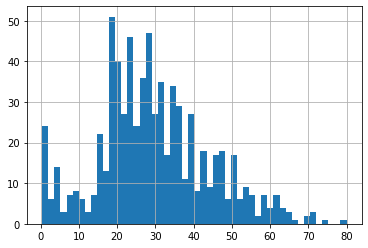

In [49]:
df.Age.hist(bins=50)

#### Addvanteges
1. Easy to implement 
2. captures the important of missingess if there is one 
#### Disadvantages
1. Distorst The original Distribution of the variable
2. if missingess is not important, it may mask predictive power of the original variable by distorting its distribution 
3. Hard to decide which value to use  